### 1. 목표
- iris 꽃의 특징을 활용해서 품종을 분류하는 모델을 만들어보자
- knn 모델을 사용하고, 하이퍼파라미터를 조정해보자(하이퍼파라미터 튜닝)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### 2. 데이터 수집
- sklearn에 내장된 데이터 이용

In [25]:
iris_data = load_iris()

In [26]:
iris_data # 데이터 살펴보기

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
# 어떤 키값이 있는지
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
# 꽃잎, 꽃받침 길이, 넓이 측정 데이터
# 문제, 특성 데이터
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
# 꽃의 품종 정보(3가지 품종 중 하나)
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
# 꽃 품종 이름
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# 꽃 특성 이름
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
# 요약된 정보
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 3. 데이터 전처리
- 결측치, 이상치 처리
- 데이터 단위

In [33]:
# df로 만들기
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 4. EDA(탐색적 데이터 분석)
- 산점도 그래프 그리기
- Pandas 라이브러리를 활용하기(데이터 변환 필요)

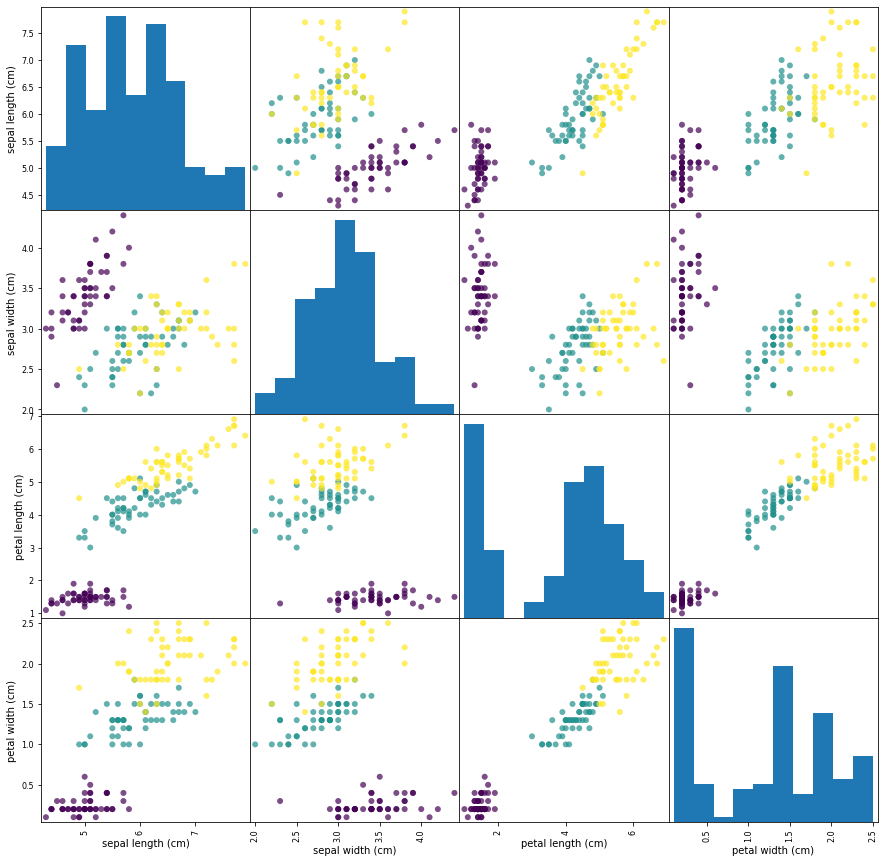

In [35]:
# 시각화
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker='o', c=iris_data.target, alpha=0.7)
plt.show()

In [36]:
# 세 품종이 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분되어 보임
# 한 품종(보라색)은 확실하게 잘 분류가 될 것 같고, 나머지 두 품종은
# 겹치는 부분이 있지만 그래도 분류가 잘 될것 같다
# => 분류 모델을 적용시켜도 좋겠다

### 5. 모델 선택

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_model = KNeighborsClassifier() #모델생성

### 6. 모델 학습
- 문제와 답으로 분리
- 학습 데이터와 테스트 데이터로 분리(7:3)

In [39]:
# 문제 데이터 (x)
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
# 정답 데이터 (y)
iris_data.target
# 7:3의 비율로 바로 나누면 편중된 데이터로 학습

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
from sklearn.model_selection import train_test_split #랜덤으로 숫자를 돌려서

In [43]:
# 학습 데이터와 테스트 데이터로 분리(7:3)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    random_state=65) #랜덤 고정 숫자

In [44]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [45]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [46]:
# 모델 학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### 7. 모델 평가

In [50]:
# 예측된 결과를 변수에 담는다
pre = knn_model.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [55]:
metrics.accuracy_score(pre, y_test)

0.9473684210526315

In [57]:
# 정확도, 재현율, 정밀도 등 계산해서 보여줌
print(classification_report(pre, y_test))
# recall : 재현율
# precision : 정밀도

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      1.00      0.91        10
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



### 8. 하이퍼파라미터 튜닝
- 최적의 이웃 숫자를 찾아보자

In [58]:
# 모델 성능 굿 -> 일반화 된 모델
# k(이웃의 수)를 바꾸는 것 -> 하이퍼파라미터 튜닝
# k가 작을수록 모델이 복잡해진다 -> 과대적합 경향이 있다
# k가 클수록 모델이 단순해짐 -> 과소적합 경향이 있다

# 과대적합 - train 성늘 높고, test 성능 낮고
# 과소적합 - train 성능 낮고, test 성능 낮고
# 일반화 - train 성능 높고, test 성능 높고

In [68]:
train_list=[] # train 성ㅇ능이 담길 리스트
test_list =[] # test 성능이 담길 리스트

for k in range(1, 105, 2):
    # k값에 따른 모델 생성(복잡모델 -> 단순모델)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    train_list.append(train_score)
    test_score = model.score(X_test, y_test)
    test_list.append(test_score)

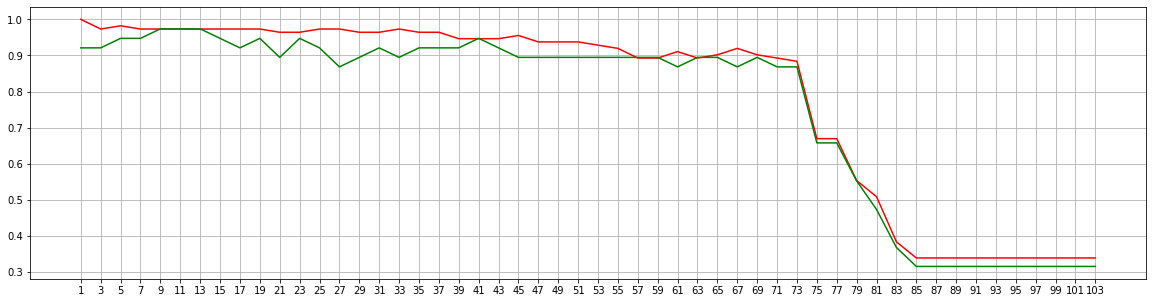

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(range(1, 105, 2), train_list, c='red')
plt.plot(range(1, 105, 2), test_list, c='green')
plt.xticks(range(1, 105, 2))
plt.grid()
plt.show()
# 5~13 구간일 때 일반화에 가까운 지점

### 9. 모델 선정 및 활용

In [70]:
# 튜닝을 통해 확인한 최적의 이웃의 숫자로 최종 모델 선정
final_model = KNeighborsClassifier(n_neighbors=9)

In [71]:
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [72]:
final_model.score(X_test, y_test)

0.9736842105263158

In [73]:
final_model.predict([[3.0, 2.7, 1.0, 0.3]])

array([0])

In [75]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
